**读取数据**

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math

path = r'G:\课件\人工智能\作业\实验5——聚类实验\cluster_data.csv'   #使用pandas读取数据
data1 = pd.read_excel(path, sheet_name = 0, header = None)            # 注意要将header设置为None，不把首行作为属性栏 
data2 = pd.read_excel(path, sheet_name = 1, header = None)
print(data1.head())

data1 = np.array(data1)
data2 = np.array(data2)

           0          1         2
0   2.434987  -5.024708 -5.101209
1   6.125706  -8.336655 -8.763105
2  -5.542094  -3.692776  7.561641
3  10.501229  10.490613  4.411810
4   1.762528  -9.565436 -5.095134


**定义k_means函数(传入数据和分组数)**

In [71]:
def cal(VecA, VecB):                  #计算两个向量的距离                
    x = 0
    for i in range(len(VecA)):
        x += (VecA[i] - VecB[i]) * (VecA[i] - VecB[i])
    return math.sqrt(x)

def k_means(data, group):                    #定义进行k均值计算的函数，其中data表示数据，group表示分的类簇个数
    mark = [0 for i in range(len(data))]               #mark记录每个元素被分到哪个类簇(1， 2...group)
    u = []                                             #u用来记录均值向量
    for i in range(group):  
        k = random.randint(0,len(data) - 1)              #先从data中随机选取group个样本作为初始化向量
        while(mark[k] != 0):                            #注意选取的样本不要重复
            k = random.randint(0,len(data) - 1)
        mark[k] = i + 1
        u.append(list(data[k]))
                    
    
    isChange = True
    while(isChange):                                     #当分组不再改变，跳出循环
        isChange = False
        for i in range(len(data)):                    
            group_index = 0
            min_distance = 0
            for j in range(group):                         #计算出与某个样本最近的均值向量，距离为min_distance, 组号为group_index
                tmp = cal(data[i], u[j])
                if(group_index == 0 or tmp < min_distance):
                    group_index = j + 1
                    min_distance = tmp
            if(mark[i]  != group_index):                   #更新组号
                isChange = True
                mark[i] = group_index
        
        for i in range(group):                            #更新均值向量
            for j in range(len(u[0])):
                u[i][j] = 0
        num = [0 for i in range(group)]                   #num记录每个组里面分了多少个样本
        for i in range(len(data)):
            num[mark[i]-1] += 1
            for j in range(len(data[0])):
                u[mark[i]-1][j] += data[i][j]
                
        for i in range(group):
            for j in range(len(u[0])):
                u[i][j] /= num[i]
                
    ans = [[] for i in  range(group)]
    for i in range(len(data)):
            ans[mark[i]-1].append(data[i])
    for i in range(group):
        ans[i] = np.array(ans[i])
        
    return np.array(u), ans 

u1, ans1 = k_means(data1, 3)
u2, ans2 = k_means(data2, 4)
print(u1)                            #展示均值向量        

[[ 8.35267589  6.01590159  3.89400694]
 [-5.32335083 -4.14173265  8.25722883]
 [ 4.03885747 -6.18501032 -6.0873828 ]]


**可视化结果**

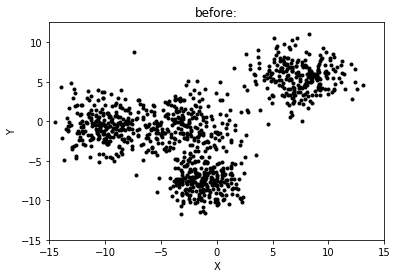

In [72]:
ax1 = plt.subplot(1, 1, 1)                         #第一个参数表示行数，第二个表示列数，第三个表示索引              

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('before:')
plt.xlim(xmax=15, xmin=-15)
plt.ylim(ymax=12.5, ymin=-15)
ax1.scatter(data2[:,0], data2[:,1], c='k', marker='.')

plt.show()

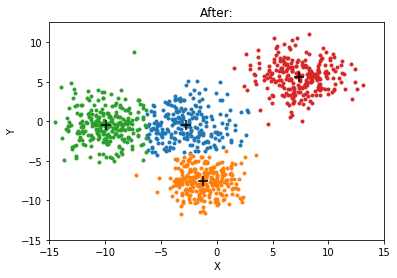

In [73]:
ax2 = plt.subplot(1, 1, 1)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('After:')
for i in range(4):
    ax2.scatter(ans2[i][:,0], ans2[i][:,1], marker='.')
ax2.scatter(u2[:, 0], u2[:, 1], s = 100, c = 'black', marker = '+')
plt.xlim(xmax=15, xmin=-15)
plt.ylim(ymax=12.5, ymin=-15)

plt.show()

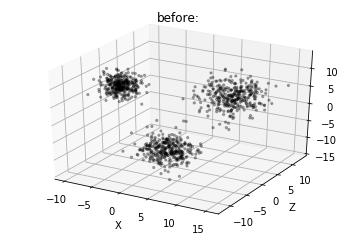

In [76]:
from mpl_toolkits.mplot3d import Axes3D

ax3 = plt.axes(projection='3d')

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_ylabel('Z')
ax3.set_title('before:')
ax3.scatter(data1[:,0], data1[:,1], data1[:, 2], alpha=0.3, c = 'k', marker='.')

plt.show()

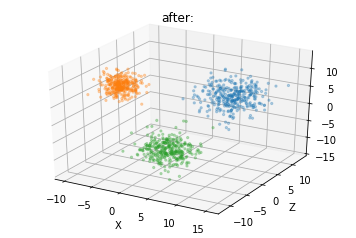

In [75]:
ax4 = plt.axes(projection='3d')

ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_ylabel('Z')
ax4.set_title('after:')
for i in range(3):
    ax4.scatter(ans1[i][:,0], ans1[i][:,1], ans1[i][:,2], alpha=0.3, marker='.')
ax2.scatter(u1[:, 0], u1[:, 1], u1[:, 2], c = 'black', marker = '+')

plt.show()